In [2]:
import pylheV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [3]:
particlesDict = {}

In [4]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [5]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [6]:
hist = []
#Reading the file
for e in pylheV.readLHE('ChargeMultiplicity.lhe'):
    count = 0
    for i in range(int(e.eventinfo.nparticles)):
        #Getting the attributes
        particle_id = abs(e.particles[i].id)
        particle_status = e.particles[i].status
        
        #Verifying if the particle is final and charged
        if (particle_status > 0) and (particlesDict[particle_id]['chargeType'] != 0):
            count = count+1
    hist.append(count)
    
            
    

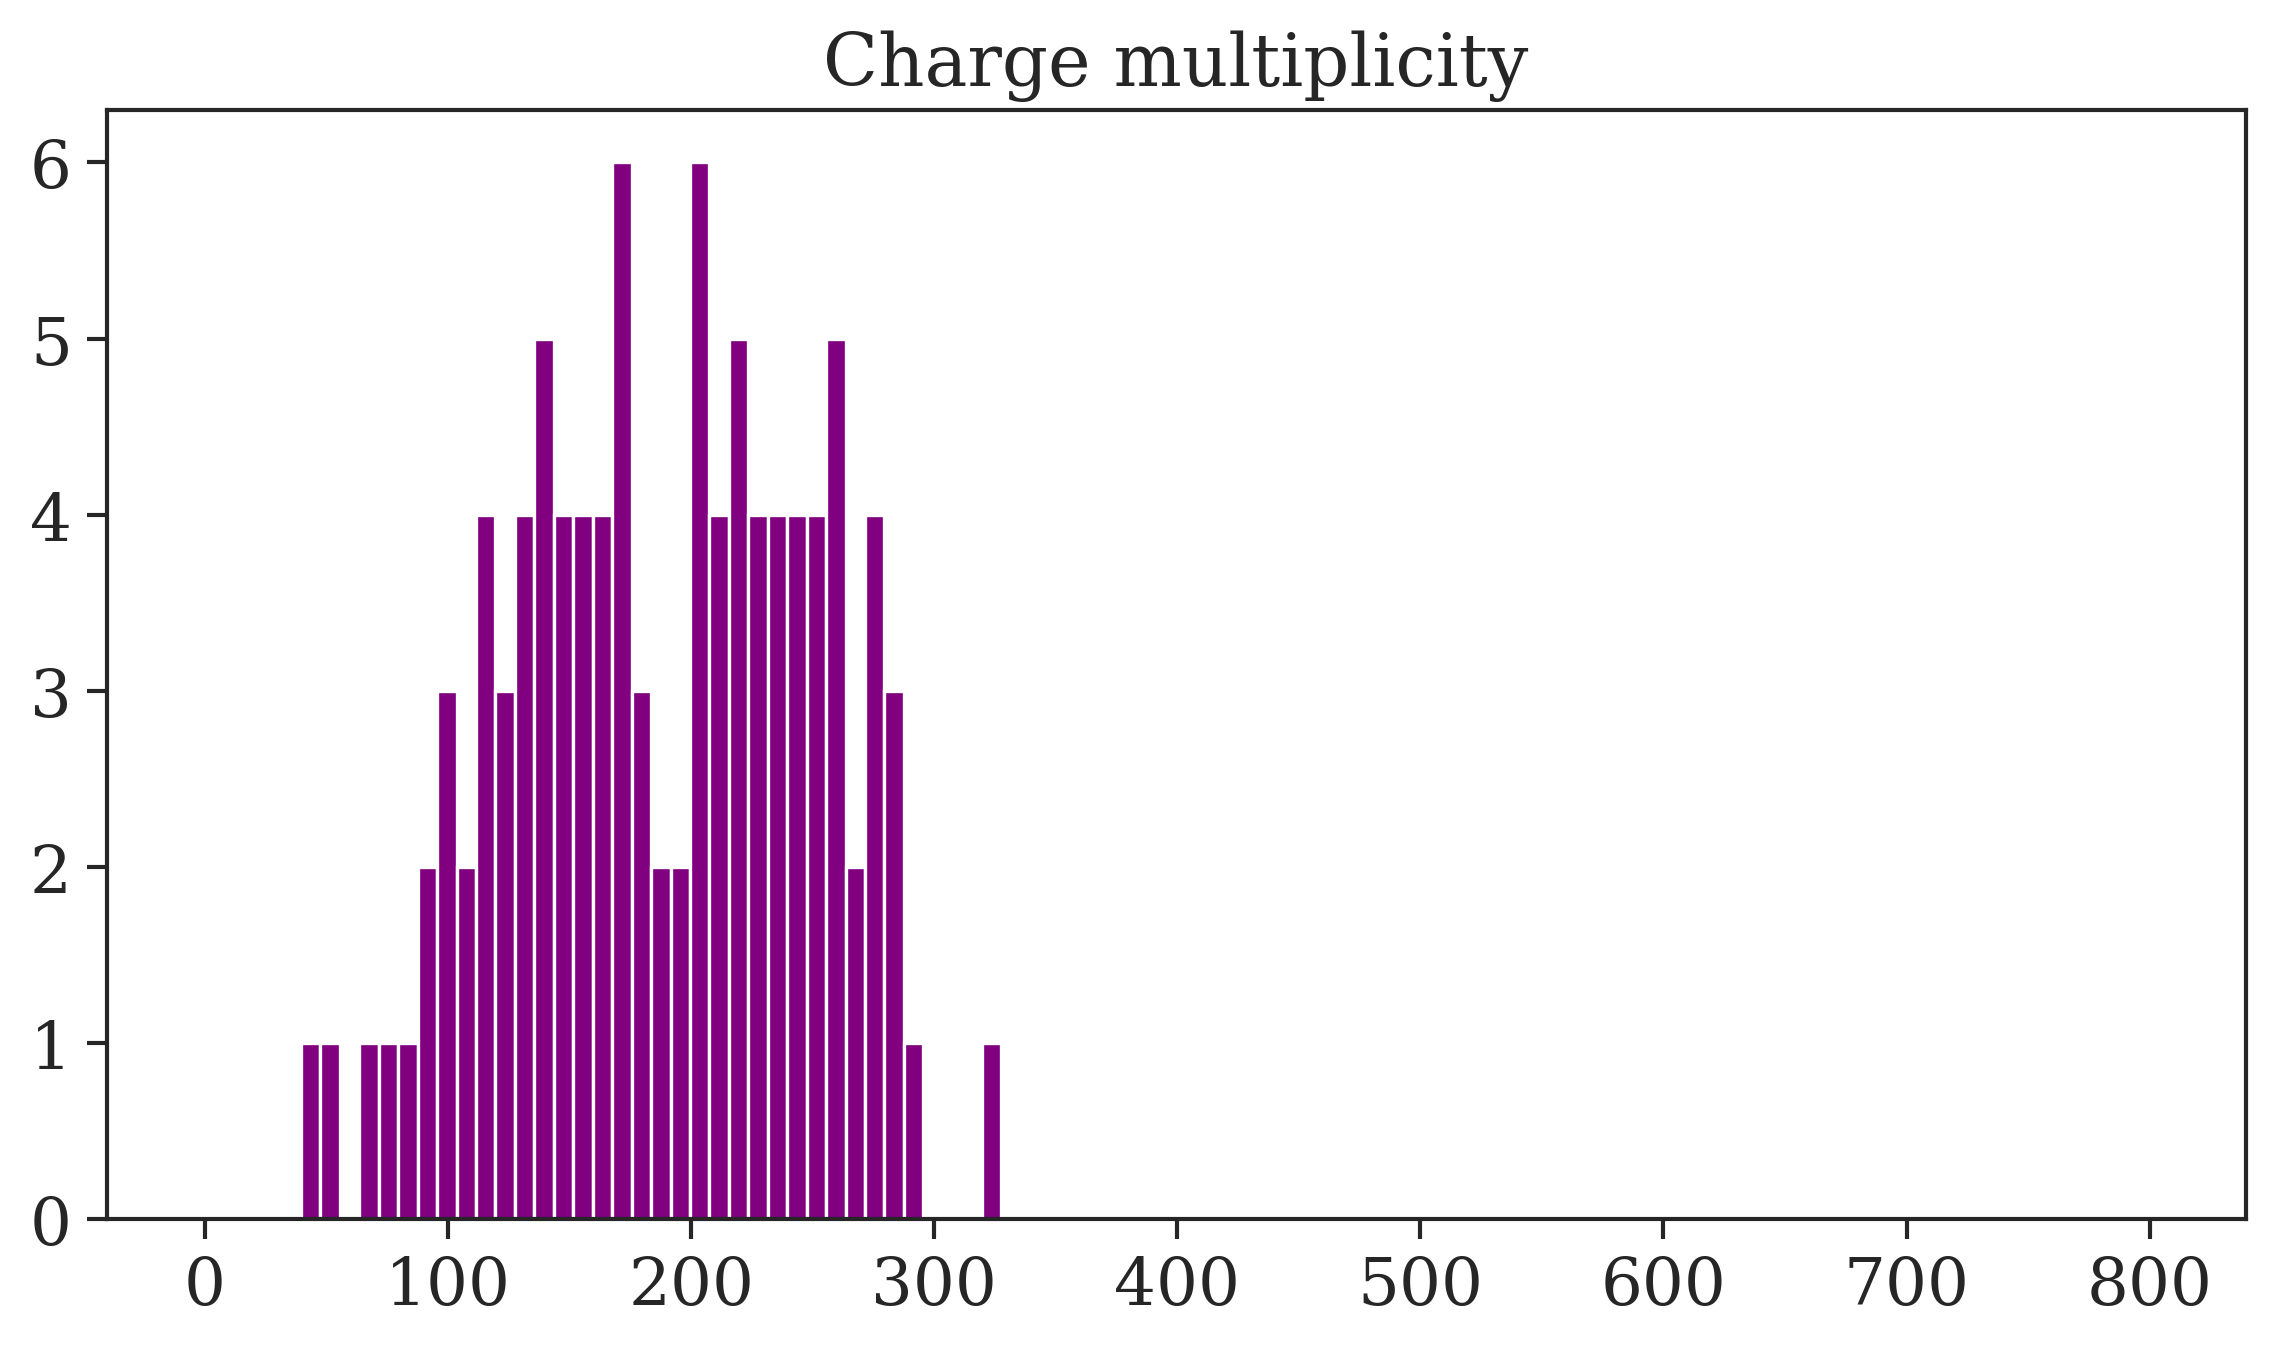

In [40]:
#Ploting the charge multiplicity of main01.cc
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(hist, bins = 100, range = [-0.5,799.5],color = 'purple')

plt.title(r'Charge multiplicity')
plt.show()

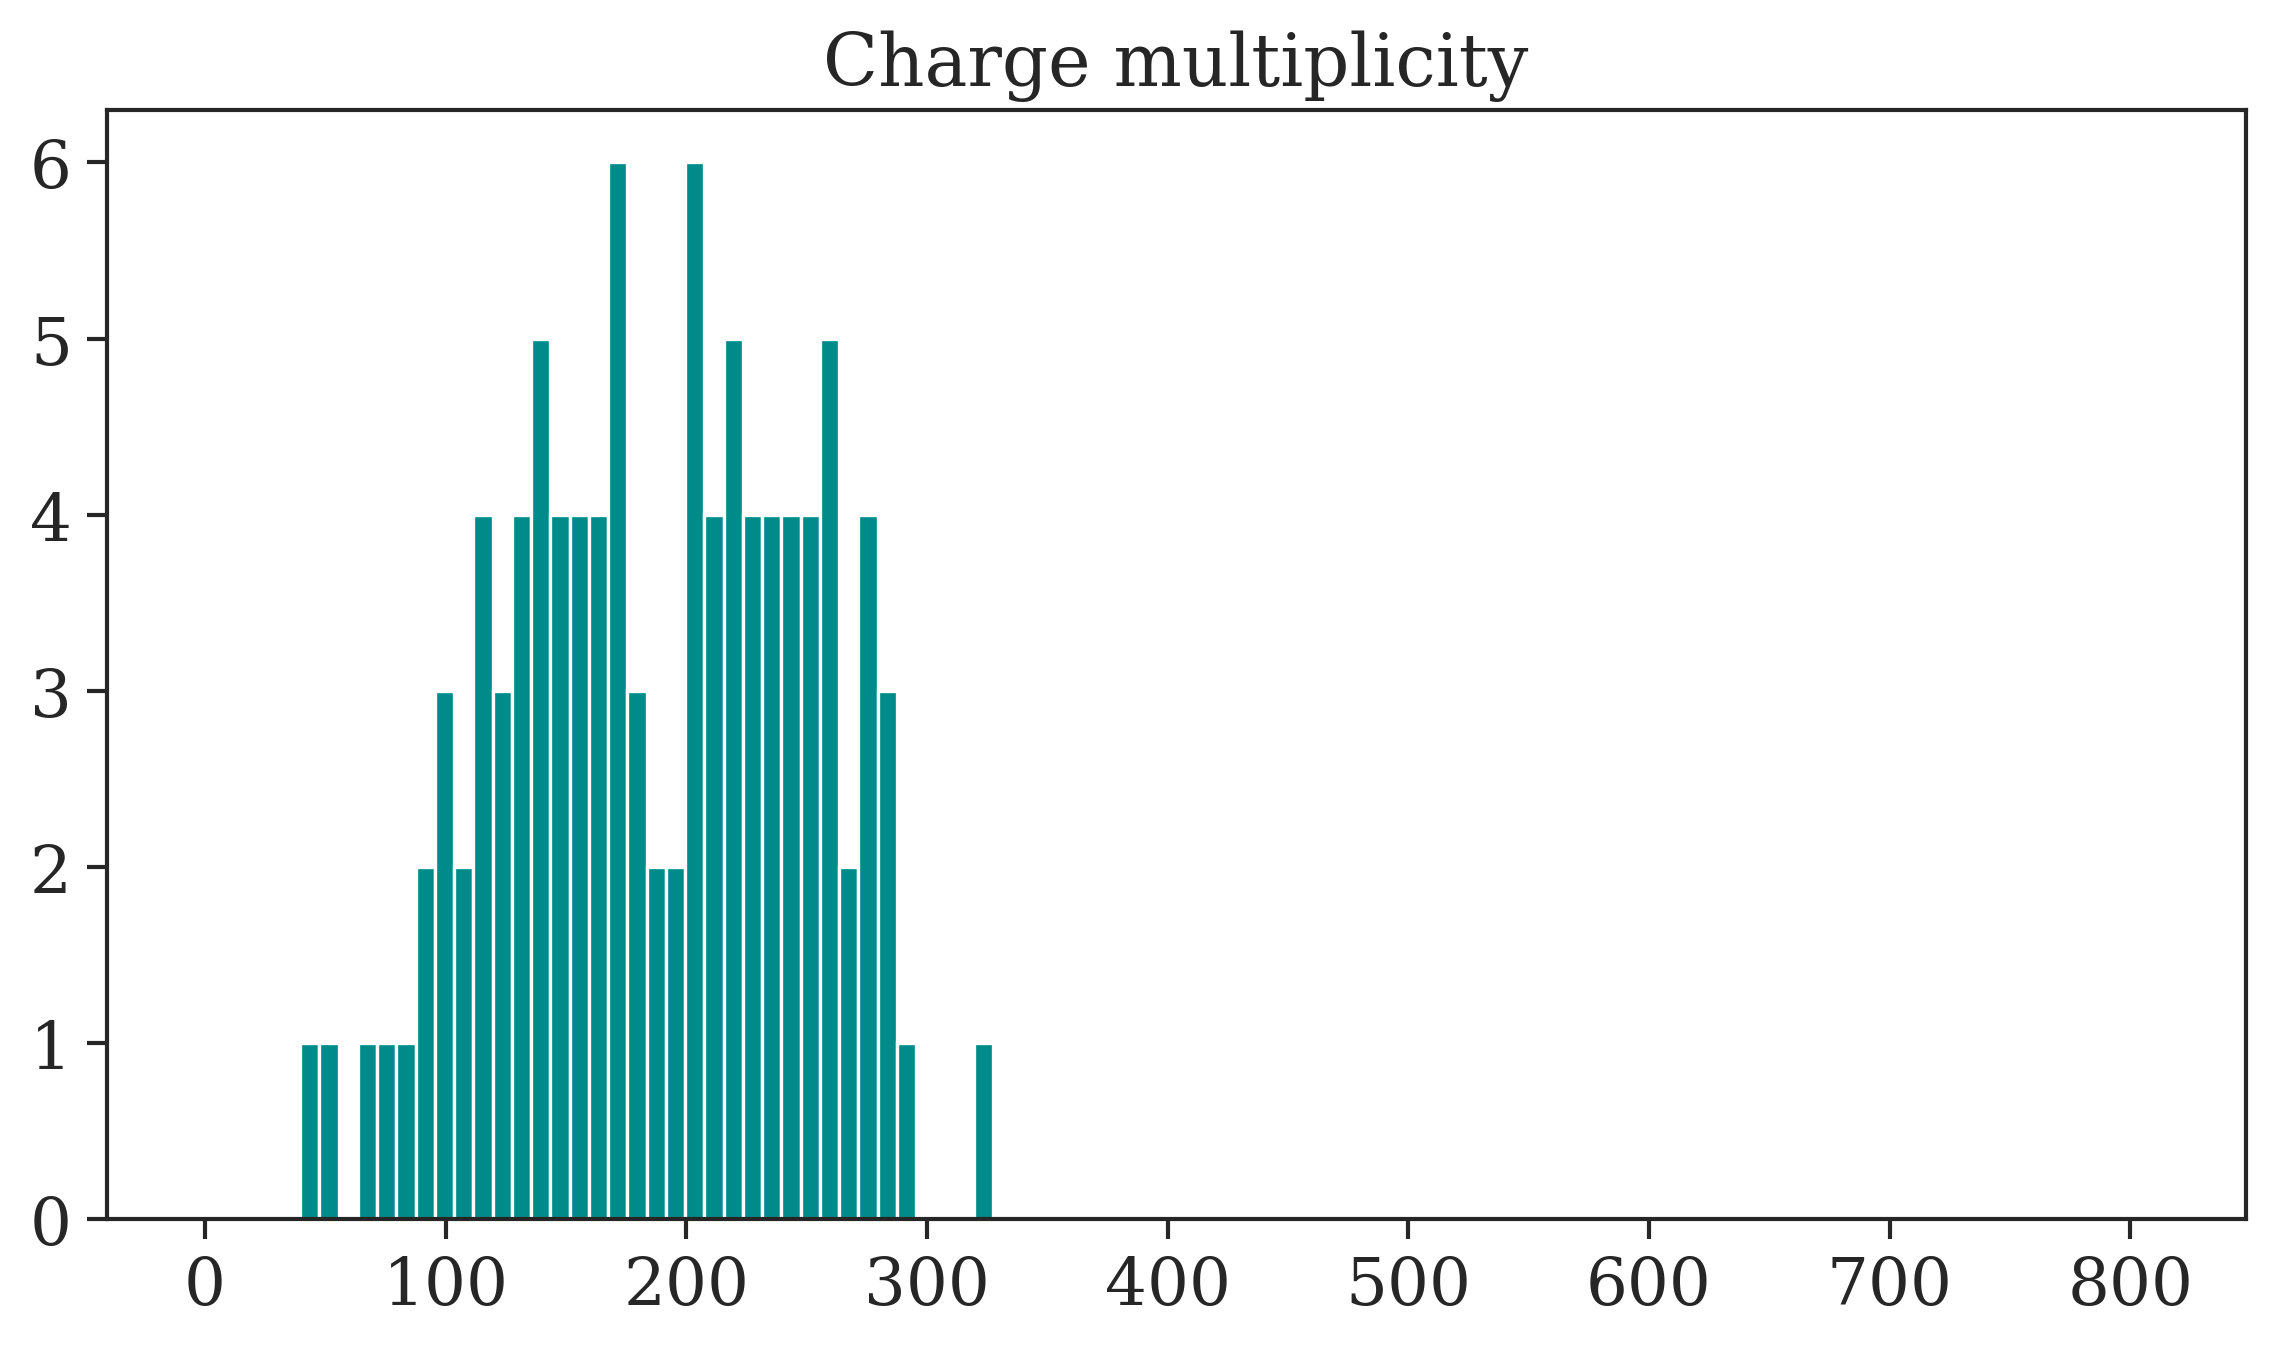

In [41]:
#Ploting the charge multiplicity of main01.cc

#Pythia histogram
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
y = np.genfromtxt('Ncharge-0.dat',usecols = 1)
x = np.genfromtxt('Ncharge-0.dat',usecols = 2)

plt.bar(x,y, align='edge', width = 8, color = 'darkcyan')

plt.title(r'Charge multiplicity')
plt.show()

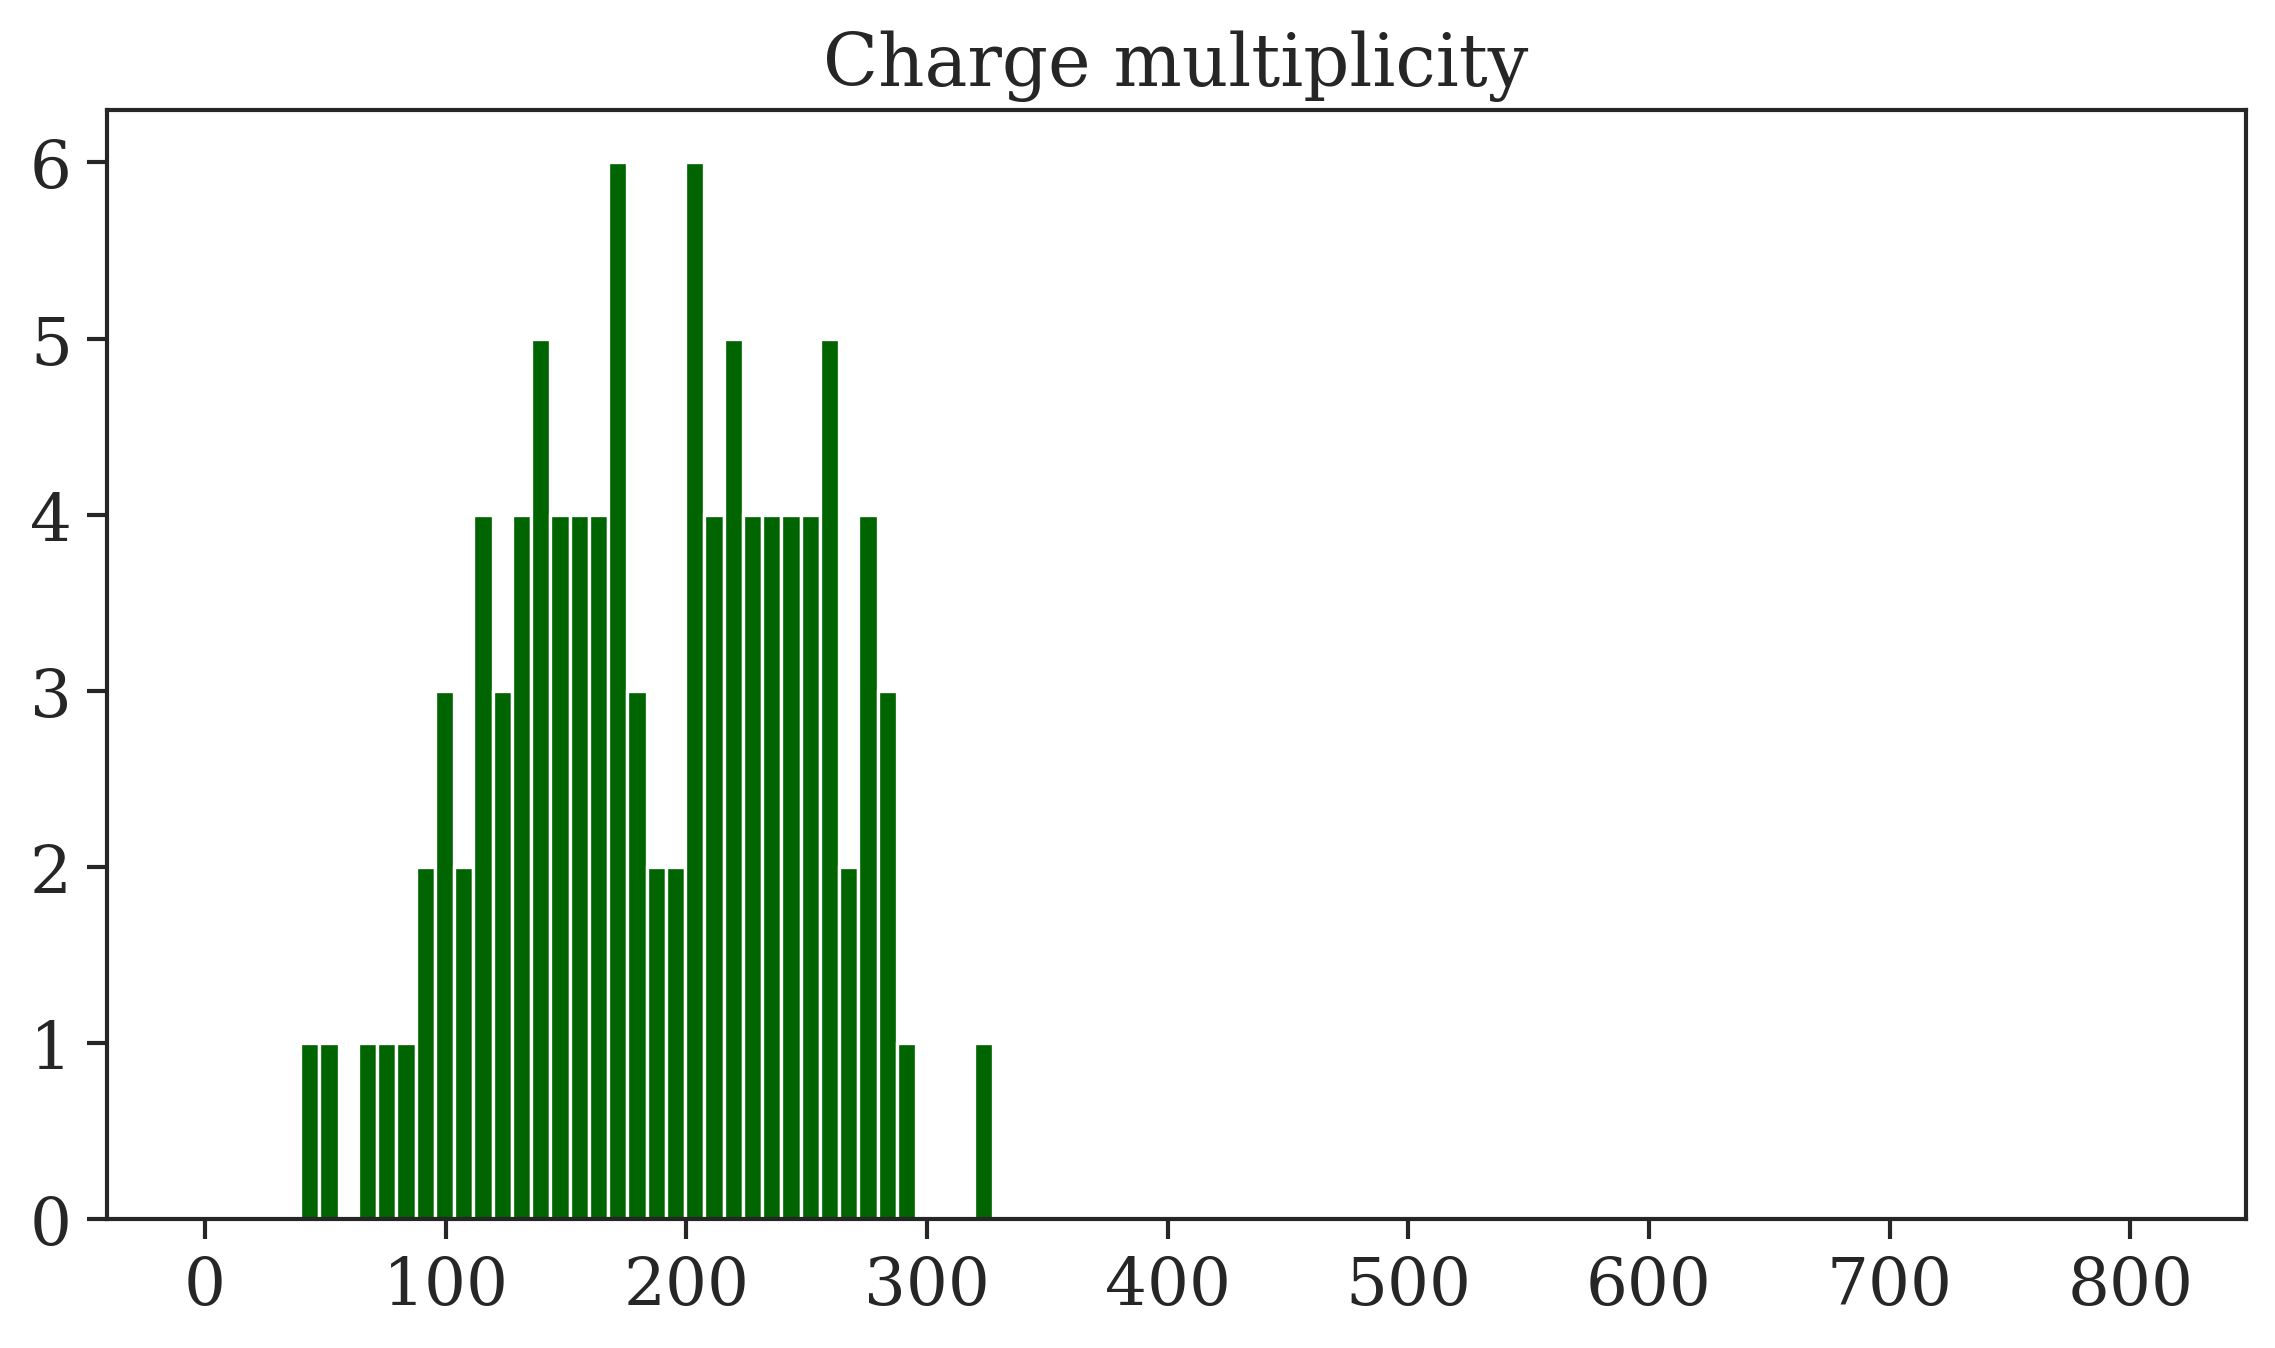

In [42]:
#Ploting the charge multiplicity of main01.cc

fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
#LHE histogram
histogram = plt.hist(hist, bins = 100, range = [-0.5,799.5],color = 'purple', )

#Pythia histogram
y = np.genfromtxt('Ncharge-0.dat',usecols = 1)
x = np.genfromtxt('Ncharge-0.dat',usecols = 2)
plt.bar(x,y, align='edge', width = 8,color = 'darkgreen') 

plt.title(r'Charge multiplicity')
plt.show()